In [1]:
import h5py
import pickle 
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
filename1=('/project/rpp-chime/chime/chime_processed/holography/holo_stack/CygA/CYG_A_20181017T021625_to_20191016T022121.h5')
f1 = h5py.File(filename1,'r') 
freqs = f1['index_map']["freq"][()]
lst=[]
angle = f1['index_map']["pix"][()]
for i in angle:
    x=i[1]
    lst.append(x)
#print(len(lst))
frequencies=list(range(1024))
feeds=list(range(2048))
print(np.shape(frequencies))
print(np.shape(feeds))

import statistics

(1024,)
(2048,)


In [2]:
freq600 = f1['index_map']["freq"][107]
print(freq600)

758.203125


In [3]:
FFF=[]
for j in feeds:
    freq600 = f1['index_map']["freq"][107]
        #print(freq600)
    yy600=f1['beam'][107,0,j]
    max_y = max(yy600)
        #print(max_y)
    half = (max_y)/2.0
        #print(half)
    if max_y==0:
        FFF.append(None)
    else:
        max_index=np.where(yy600 == max_y)
        number= max_index[0][0] # This is the index of maximum y value in the list. Peak value of y.
            #print(number)
        y1=yy600[0:number+1]   # List from 1st value to the peak value in the parent list.
        x1=lst[0:number+1]

        y2=yy600[number:]      # List from the peak value to the last value in the parent list.
        x2=lst[number:]
    
        x1_interp = scipy.interpolate.interp1d(y1,x1)
        x2_interp = scipy.interpolate.interp1d(y2,x2)

        x1_half= x1_interp(half)
        x2_half= x2_interp(half)
    
        FWHM = (x2_half - x1_half)
        FFF.append(np.absolute(FWHM))

print(np.shape(FFF))


(2048,)


Text(0.5, 1.0, '758.203125 MHz')

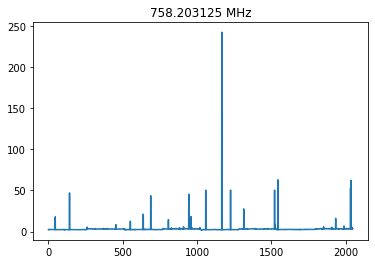

In [4]:
plt.plot(FFF)
plt.title('758.203125 MHz')

In [5]:
xyz=np.array(FFF, dtype=np.float)
ddd=[]
for i in xyz:
    if (i<4):
        ddd.append(i)
    else:
        ddd.append(np.nan)

/tmp/ipykernel_63217/120510430.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xyz=np.array(FFF, dtype=np.float)


(2048,)

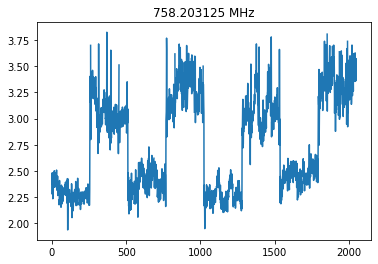

In [6]:
plt.plot((ddd))
plt.title('758.203125 MHz')
np.shape(ddd)

(256,)
(256,)
(256,)
(256,)


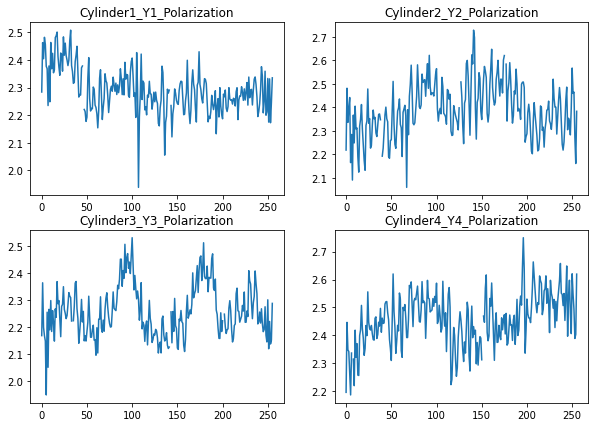

In [7]:
Y1= ddd[0:256]
Y2= ddd[512:768]
Y3= ddd[1024:1280]
Y4= ddd[1536:1792]
print(np.shape(Y1))
print(np.shape(Y2))
print(np.shape(Y3))
print(np.shape(Y4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_Y1_Polarization")
plt.plot(Y1)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_Y2_Polarization")
plt.plot(Y2)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_Y3_Polarization")
plt.plot(Y3)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_Y4_Polarization")
plt.plot(Y4)
#plt.show()


In [8]:
# mean and standard deviation
y1_mean=np.nanmean(Y1)
y1_std=np.nanstd(Y1)
print(y1_mean,y1_std)

y2_mean=np.nanmean(Y2)
y2_std=np.nanstd(Y2)
print(y2_mean,y2_std)

y3_mean=np.nanmean(Y3)
y3_std=np.nanstd(Y3)
print(y3_mean,y3_std)


y4_mean=np.nanmean(Y4)
y4_std=np.nanstd(Y4)
print(y4_mean,y4_std)


2.289886288046004 0.08055827345424456
2.3917882414186513 0.11424954953831802
2.2591250405494336 0.0948797547912481
2.457265446665328 0.09368916126283815


In [9]:
Y_pol = np.concatenate((Y1, Y2,Y3,Y4))
print(np.shape(Y_pol))

(1024,)


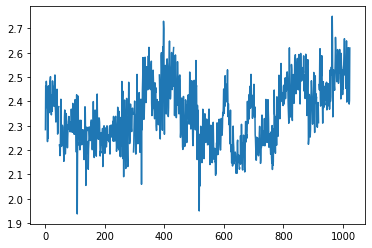

In [10]:
plt.plot(Y_pol)

In [11]:
with open("Beam_offset_CygA_758", "rb") as fp:   # Unpickling
       b = pickle.load(fp)

print(np.shape(b))

(2048,)


In [12]:
type(b)

list

In [13]:
yo=np.array(b, dtype=np.float)

/tmp/ipykernel_63217/1803992708.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yo=np.array(b, dtype=np.float)


In [14]:
print(yo)
np.shape(yo)

[0.25       0.33333334 0.25       ... 0.16666667 0.08333334 0.25      ]


(2048,)

(256,)
(256,)
(256,)
(256,)
-0.010582011281734421 2.289886288046004
-0.14591568169504288 2.3917882414186513
0.04790026366006671 2.457265446665328
0.04790026366006671 2.457265446665328


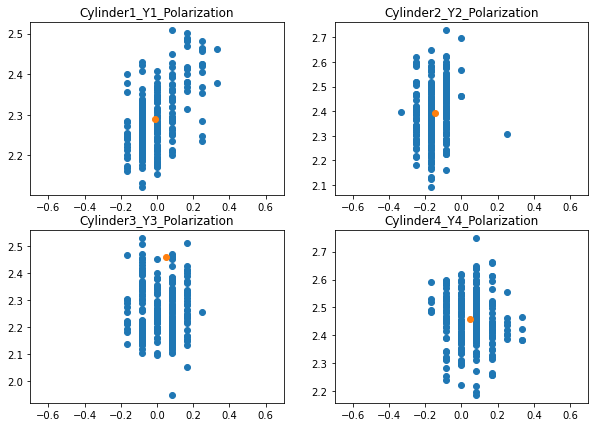

In [15]:
Y11= yo[0:256]
Y22= yo[512:768]
Y33= yo[1024:1280]
Y44= yo[1536:1792]
print(np.shape(Y11))
print(np.shape(Y22))
print(np.shape(Y33))
print(np.shape(Y44))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_Y1_Polarization")
plt.scatter(Y11,Y1)
plt.xlim(-0.7, 0.7)
average_beam1=np.nanmean(Y11)
average_FWHM1=np.nanmean(Y1)

plt.scatter(average_beam1,average_FWHM1)
print(average_beam1,average_FWHM1)
#plt.ylim(3, 7)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_Y2_Polarization")
plt.scatter(Y22,Y2)
plt.xlim(-0.7, 0.7)
average_beam2=np.nanmean(Y22)
average_FWHM2=np.nanmean(Y2)

plt.scatter(average_beam2,average_FWHM2)
print(average_beam2,average_FWHM2)
#plt.ylim(3, 7)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_Y3_Polarization")
plt.scatter(Y33,Y3)
plt.xlim(-0.7, 0.7)
average_beam3=np.nanmean(Y33)
average_FWHM3=np.nanmean(Y3)

plt.scatter(average_beam3,average_FWHM3)
print(average_beam3,average_FWHM3)
#plt.ylim(3, 7)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_Y4_Polarization")
plt.scatter(Y44,Y4)
plt.xlim(-0.7, 0.7)
average_beam4=np.nanmean(Y44)
average_FWHM4=np.nanmean(Y4)

plt.scatter(average_beam4,average_FWHM4)
print(average_beam4,average_FWHM4)
#plt.xlim(-0.7, 0.7)
#plt.ylim(3, 7)
#plt.show()


In [16]:
co_bad_cyl1 = ~np.logical_or(np.isnan(Y11), np.isnan(Y1))

Y11_nan=np.compress(co_bad_cyl1, Y11)  
co_Y1_nan=np.compress(co_bad_cyl1, Y1) 

co_relation1=np.corrcoef(Y11_nan,co_Y1_nan)[1,0]
print(co_relation1)



co_bad_cyl2 = ~np.logical_or(np.isnan(Y22), np.isnan(Y2))

Y22_nan=np.compress(co_bad_cyl2, Y22)  
co_Y2_nan=np.compress(co_bad_cyl2, Y2) 

co_relation2=np.corrcoef(Y22_nan,co_Y2_nan)[1,0]
print(co_relation2)


co_bad_cyl3 = ~np.logical_or(np.isnan(Y33), np.isnan(Y3))

Y33_nan=np.compress(co_bad_cyl3, Y33)  
co_Y3_nan=np.compress(co_bad_cyl3, Y3) 

co_relation3=np.corrcoef(Y33_nan,co_Y3_nan)[1,0]
print(co_relation3)


co_bad_cyl4 = ~np.logical_or(np.isnan(Y44), np.isnan(Y4))

Y44_nan=np.compress(co_bad_cyl4, Y44)  
co_Y4_nan=np.compress(co_bad_cyl4, Y4) 

co_relation4=np.corrcoef(Y44_nan,co_Y4_nan)[1,0]
print(co_relation4)

0.5504866582027315
0.17380482544436707
-0.016594410472822656
-0.07376753716728025


In [17]:
YY_pol = np.concatenate((Y11,Y22,Y33,Y44))
print(np.shape(YY_pol))

(1024,)


-0.14591568169504288 2.3917882414186513


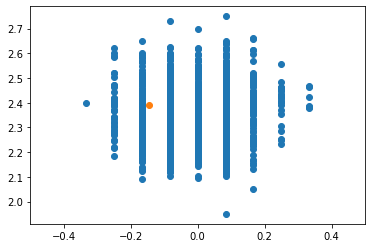

In [18]:
plt.scatter(YY_pol,Y_pol)
plt.xlim(-0.5, 0.5)
average_beam=np.nanmean(Y22)
average_FWHM=np.nanmean(Y2)

plt.scatter(average_beam,average_FWHM)
print(average_beam,average_FWHM)
#plt.ylim(3, 7)

In [19]:
print(np.nanmean(Y22))


-0.14591568169504288


(256,)
(256,)
(256,)
(256,)


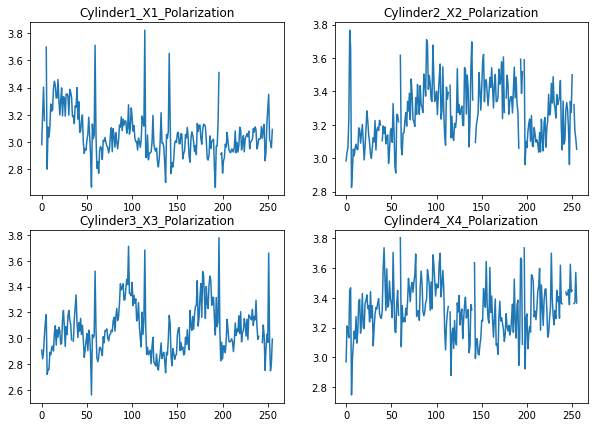

In [20]:
X1= ddd[256:512]
X2= ddd[768:1024]
X3= ddd[1280:1536]
X4= ddd[1792:2048]
print(np.shape(X1))
print(np.shape(X2))
print(np.shape(X3))
print(np.shape(X4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_X1_Polarization")
plt.plot((X1))
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_X2_Polarization")
plt.plot((X2))
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_X3_Polarization")
plt.plot((X3))
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_X4_Polarization")
plt.plot((X4))
#plt.show()

In [21]:
# mean and standard deviation
x1_mean=np.nanmean(X1)
x1_std=np.nanstd(X1)
print(x1_mean,x1_std)

x2_mean=np.nanmean(X2)
x2_std=np.nanstd(X2)
print(x2_mean,x2_std)

x3_mean=np.nanmean(X3)
x3_std=np.nanstd(X3)
print(x3_mean,x3_std)

x4_mean=np.nanmean(X4)
x4_std=np.nanstd(X4)
print(x4_mean,x4_std)

3.0589652123827142 0.16891686497931488
3.2726138121684314 0.17437440081618624
3.0680495746477328 0.1920982533409933
3.3253399188057253 0.17362036045589907


In [22]:
X_pol = np.concatenate((X1, X2,X3,X4))
print(np.shape(X_pol))

(1024,)


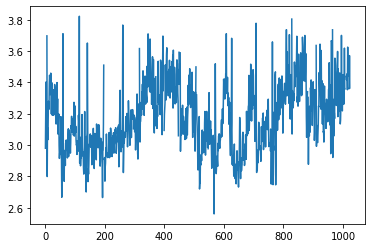

In [23]:
plt.plot(X_pol)

(256,)
(256,)
(256,)
(256,)


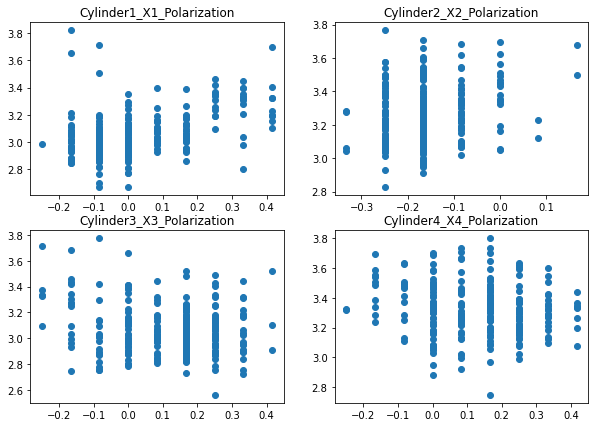

In [24]:
X11= yo[256:512]
X22= yo[768:1024]
X33= yo[1280:1536]
X44= yo[1792:2048]
print(np.shape(X11))
print(np.shape(X22))
print(np.shape(X33))
print(np.shape(X44))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_X1_Polarization")
plt.scatter(X11,X1)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_X2_Polarization")
plt.scatter(X22,X2)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_X3_Polarization")
plt.scatter(X33,X3)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_X4_Polarization")
plt.scatter(X44,X4)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()

In [25]:
Xco_bad_cyl1 = ~np.logical_or(np.isnan(X11), np.isnan(X1))

X11_nan=np.compress(Xco_bad_cyl1, X11)  
co_X1_nan=np.compress(Xco_bad_cyl1, X1) 

Xco_relation1=np.corrcoef(X11_nan,co_X1_nan)[1,0]
print(Xco_relation1)



Xco_bad_cyl2 = ~np.logical_or(np.isnan(X22), np.isnan(X2))

X22_nan=np.compress(Xco_bad_cyl2, X22)  
co_X2_nan=np.compress(Xco_bad_cyl2, X2) 

Xco_relation2=np.corrcoef(X22_nan,co_X2_nan)[1,0]
print(Xco_relation2)


Xco_bad_cyl3 = ~np.logical_or(np.isnan(X33), np.isnan(X3))

X33_nan=np.compress(Xco_bad_cyl3, X33)  
co_X3_nan=np.compress(Xco_bad_cyl3, X3) 

Xco_relation3=np.corrcoef(X33_nan,co_X3_nan)[1,0]
print(Xco_relation3)


Xco_bad_cyl4 = ~np.logical_or(np.isnan(X44), np.isnan(X4))

X44_nan=np.compress(Xco_bad_cyl4, X44)  
co_X4_nan=np.compress(Xco_bad_cyl4, X4) 

Xco_relation4=np.corrcoef(X44_nan,co_X4_nan)[1,0]
print(Xco_relation4)

0.4346947266167678
0.2018631174037416
-0.1751679321563497
-0.11934334923442423


In [26]:
XX_pol = np.concatenate((X11, X22,X33,X44))
print(np.shape(XX_pol))

(1024,)


(-0.5, 0.5)

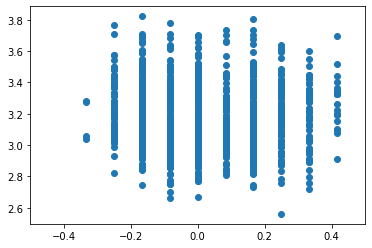

In [27]:
plt.scatter(XX_pol,X_pol)
plt.xlim(-0.5, 0.5)

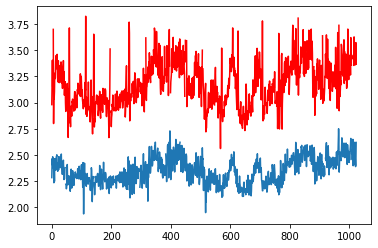

In [28]:
plt.plot(Y_pol)
plt.plot(X_pol,"red")

In [29]:
bad_pol = ~np.logical_or(np.isnan(X_pol), np.isnan(Y_pol))

X_nan=np.compress(bad_pol, X_pol)  
Y_nan=np.compress(bad_pol, Y_pol) 

relation=np.corrcoef(X_nan,Y_nan)[1,0]
print(relation)

0.7001546043042931


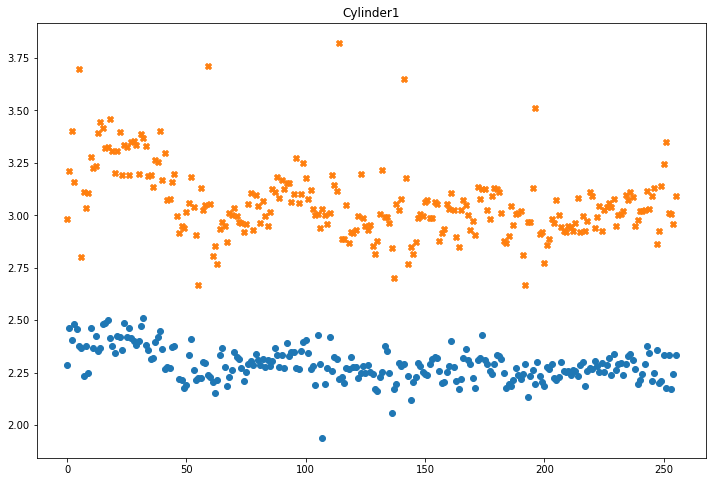

In [30]:
plt.figure(figsize=(12,8))
plt.title("Cylinder1")
#plt.plot((Y1),marker='o')
#plt.plot((X1),marker='X')
plt.scatter(range(256),(Y1),marker='o')
plt.scatter(range(256),(X1),marker='X')

In [31]:
bad_cyl1 = ~np.logical_or(np.isnan(X1), np.isnan(Y1))

X1_nan=np.compress(bad_cyl1, X1)  
Y1_nan=np.compress(bad_cyl1, Y1) 

relation1=np.corrcoef(X1_nan,Y1_nan)[1,0]
print(relation1)

0.5217346343869194


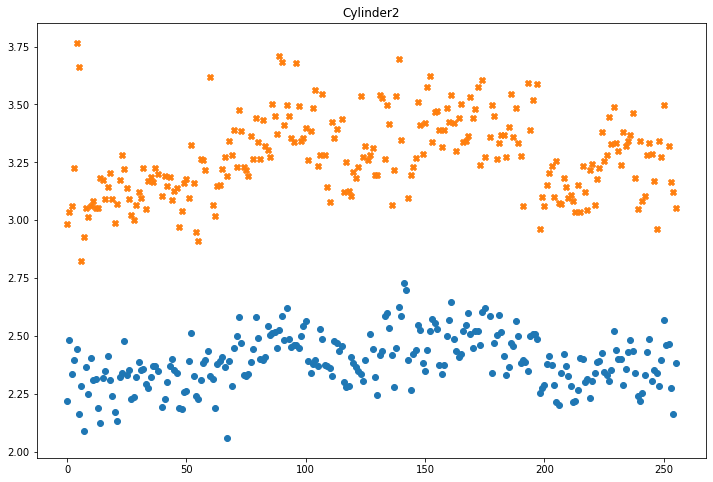

In [32]:
plt.figure(figsize=(12,8))
plt.title("Cylinder2")
plt.scatter(range(256),(Y2),marker='o')
plt.scatter(range(256),(X2),marker='X')

In [33]:
bad_cyl2 = ~np.logical_or(np.isnan(X2), np.isnan(Y2))

X2_nan=np.compress(bad_cyl2, X2)  
Y2_nan=np.compress(bad_cyl2, Y2) 

relation2=np.corrcoef(X2_nan,Y2_nan)[1,0]
print(relation2)

0.6242359185454447


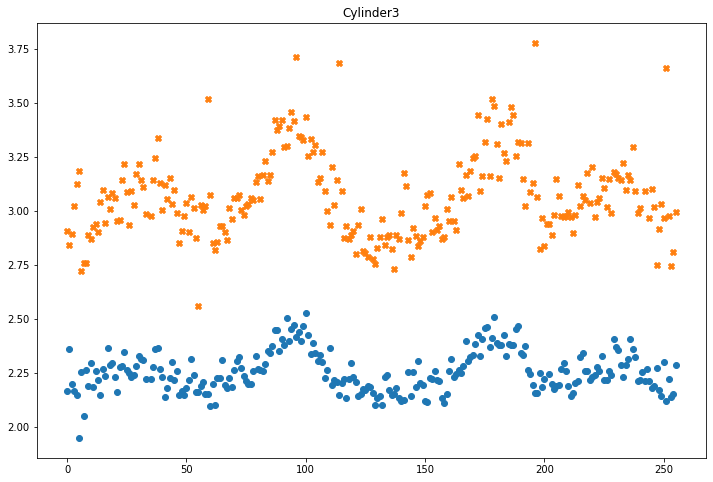

In [34]:
plt.figure(figsize=(12,8))
plt.title("Cylinder3")
plt.scatter(range(256),(Y3),marker='o')
plt.scatter(range(256),(X3),marker='X')

In [35]:
bad_cyl3 = ~np.logical_or(np.isnan(X3), np.isnan(Y3))

X3_nan=np.compress(bad_cyl3, X3)  
Y3_nan=np.compress(bad_cyl3, Y3) 

relation3=np.corrcoef(X3_nan,Y3_nan)[1,0]
print(relation3)

0.5809760983161083


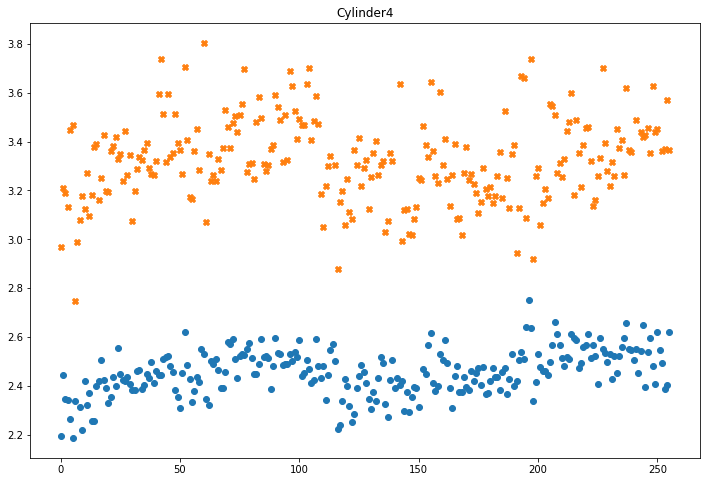

In [36]:
plt.figure(figsize=(12,8))
plt.title("Cylinder4")
plt.scatter(range(256),(Y4),marker='o')
plt.scatter(range(256),(X4),marker='X')

In [37]:
bad_cyl4 = ~np.logical_or(np.isnan(X4), np.isnan(Y4))

X4_nan=np.compress(bad_cyl4, X4)  
Y4_nan=np.compress(bad_cyl4, Y4) 

relation4=np.corrcoef(X4_nan,Y4_nan)[1,0]
print(relation4)

0.4775921881453839
